In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

files = ["pureSM.csv","T0_1em12_pureAQGC.csv","M0_pureaqgc.csv","M1_pureaqgc.csv","M7_pureaqgc.csv","S0_pureaqgc.csv","S1_pureaqgc.csv"]

In [10]:
def calcAvg(file, col):
    data_temp = pd.read_csv(file, delimiter=" ")
    data = data_temp.dropna()
    info_temp = data[col]
    info = info_temp.drop(info_temp.index[info_temp.size-1])
    avg = round(info.mean(),3)
    return avg

In [11]:
def graphError(info, shade):
    vals_normalized = np.histogram(info, bins=25,  density = True)
    y_temp,bins = vals_normalized
    
    vals = np.histogram(info, bins=25)
    notNormy_temp, _ = vals
    
    x_temp = (bins[:-1] + bins[1:]) / 2
    y = []
    x = []
    notNormy = []
    for i, val in enumerate(y_temp):
        if val != 0:
            y.append(val)
            x.append(x_temp[i])
            notNormy.append(notNormy_temp[i])
    
    norm_errors = np.sqrt(notNormy)
    relErrors = np.divide(norm_errors,notNormy, out=np.zeros_like(norm_errors),where=notNormy!=0) 
    errors =  y * relErrors
    
    plt.errorbar(x, y, yerr=errors, fmt=".", color = shade)

def graphCols(cols, file):
    data_temp = pd.read_csv(file, delimiter=" ")
    data = data_temp.dropna()
    for col in cols:
        #clean-up
        data_temp = pd.read_csv(file, delimiter=" ")
        data = data_temp.dropna()
        info_temp = data[col]
        info = info_temp.drop(info_temp.index[info_temp.size-1])
        
        #plotting
        title = col
        avg = calcAvg(file, col)
        _, _, patches = plt.hist(info, bins=25, label=title+" w/ mean: "+ str(avg), density = True, alpha = 0.5)
        shade = patches[0].get_facecolor()
        graphError(info, shade)
        plt.xlabel(file.split(".")[0])
    plt.ylabel('counts')
    plt.title('Overlayed Plots')
    plt.legend()
    plt.show()

In [12]:
#identifying columns
cols = []
allcols = pd.read_csv(files[0], delimiter=" ").columns
name = allcols[1]
index = 1
while name != "w_Default":
    cols.append(name)
    name = allcols[index]
    index+=1

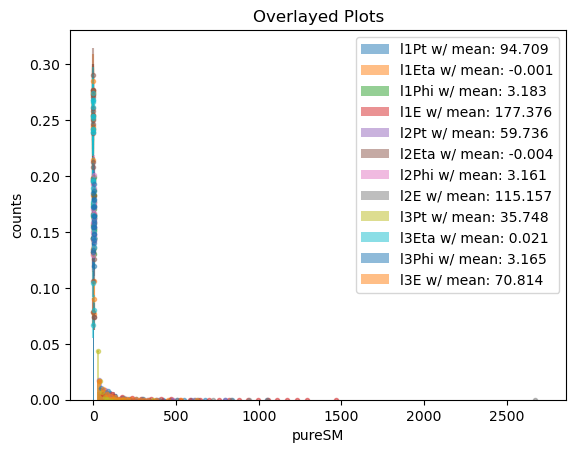

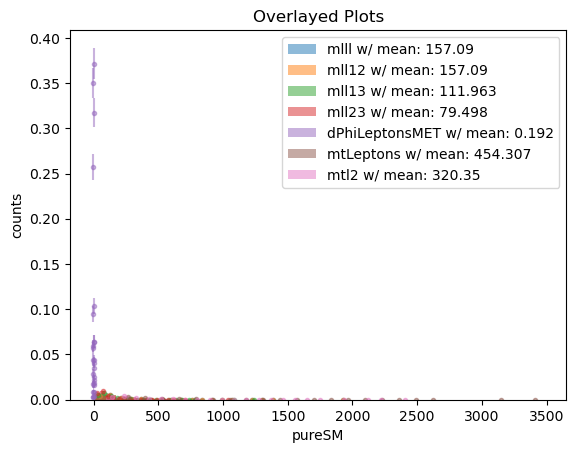

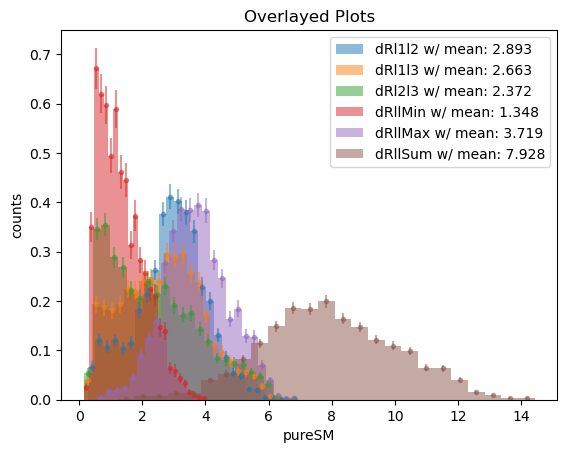

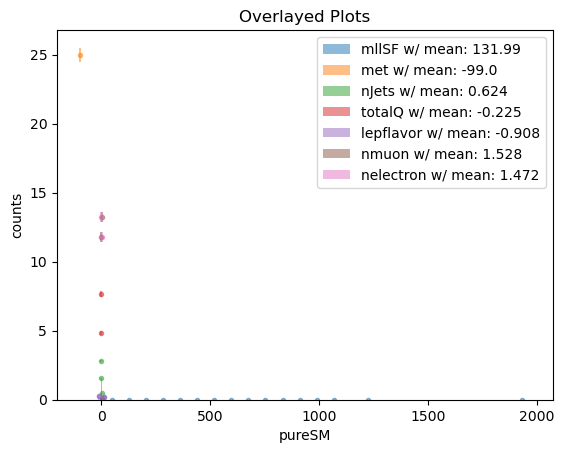

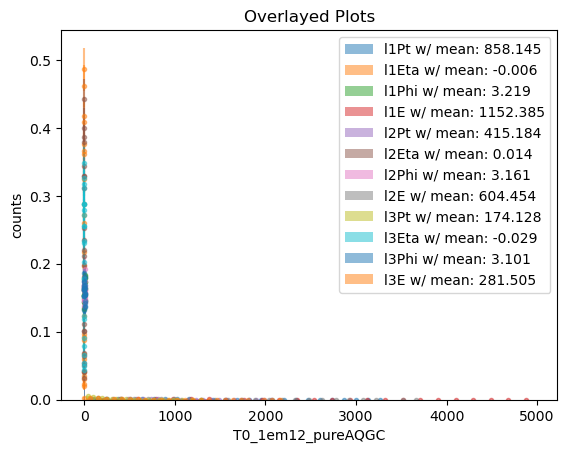

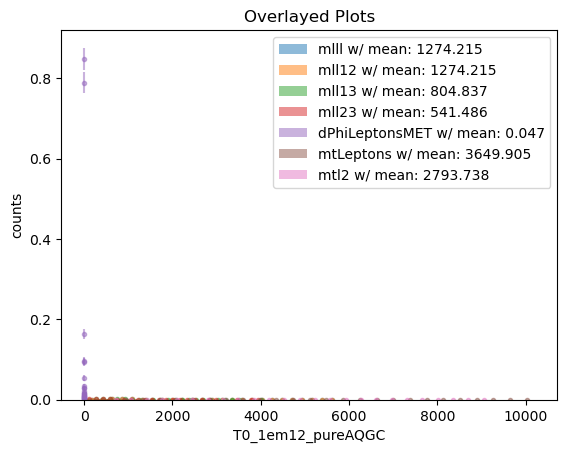

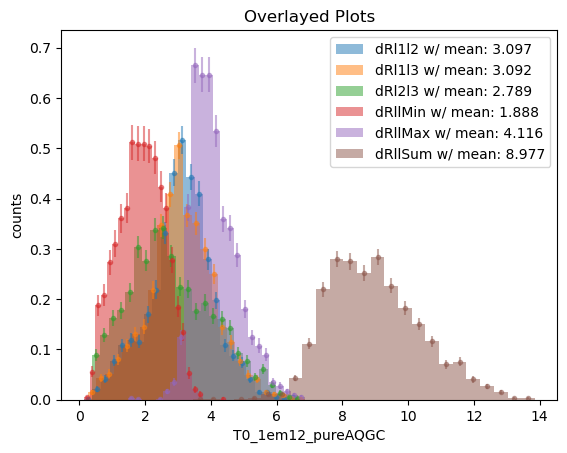

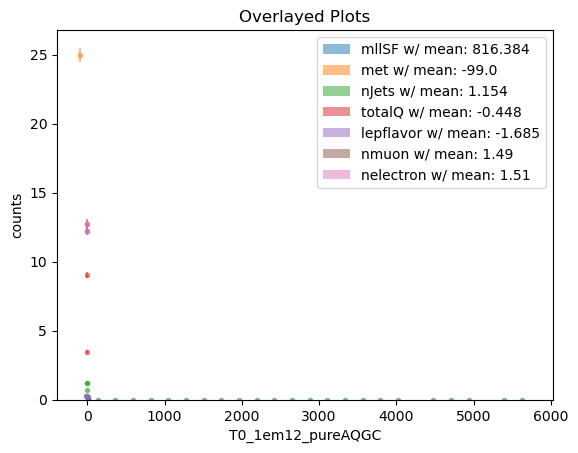

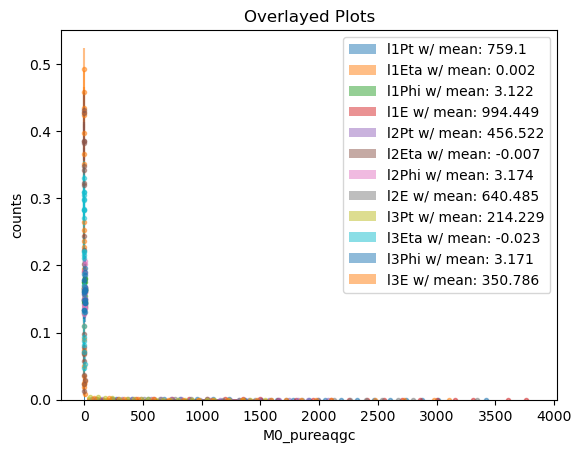

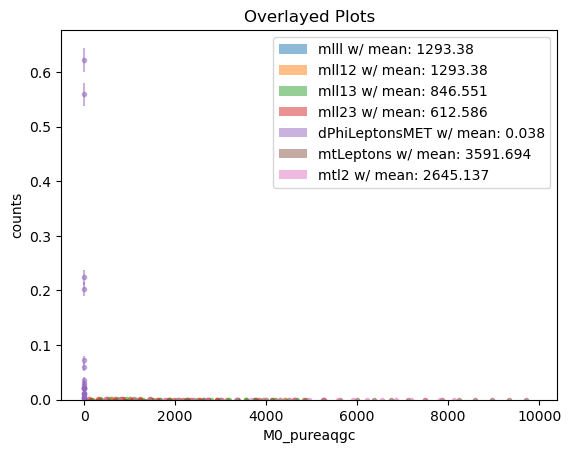

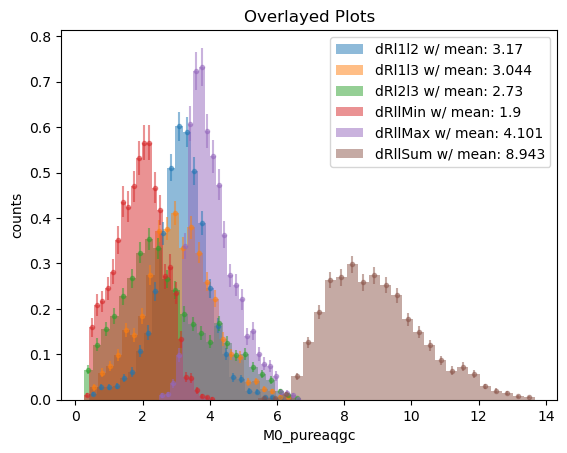

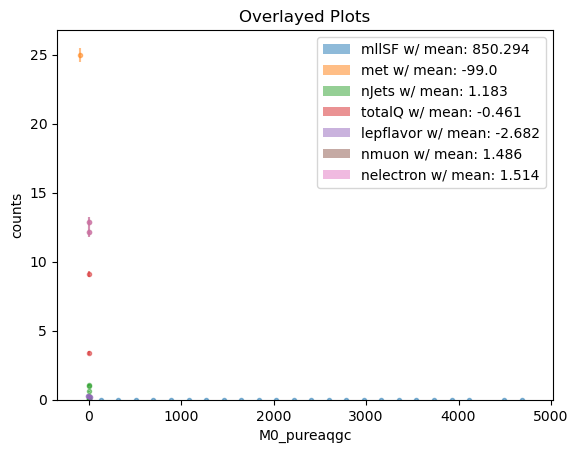

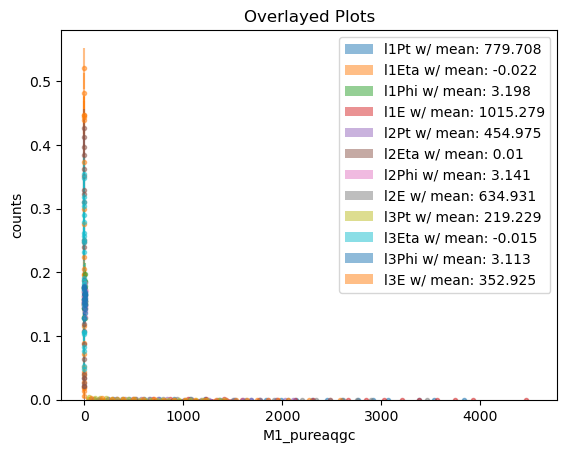

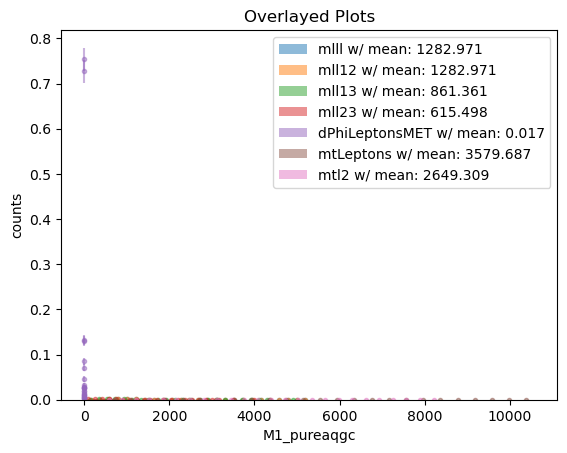

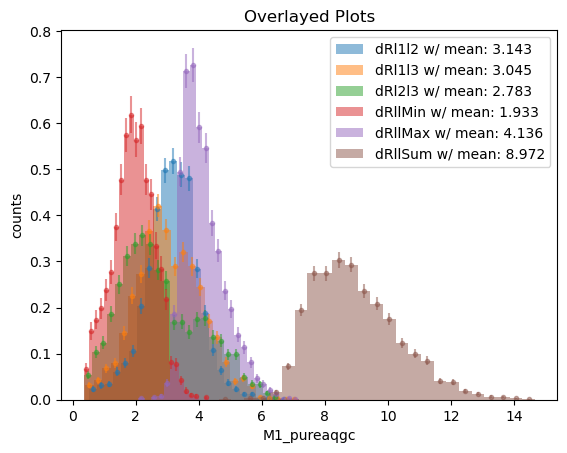

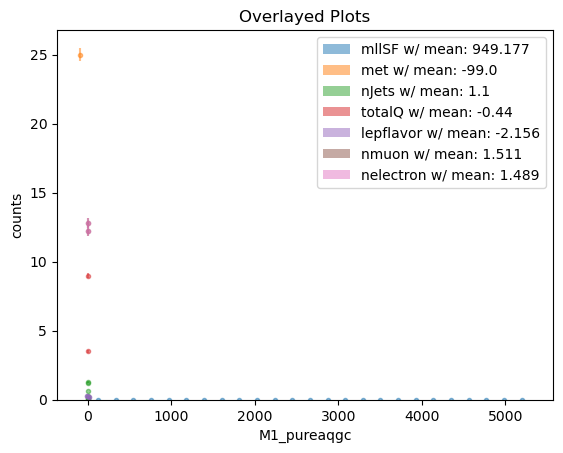

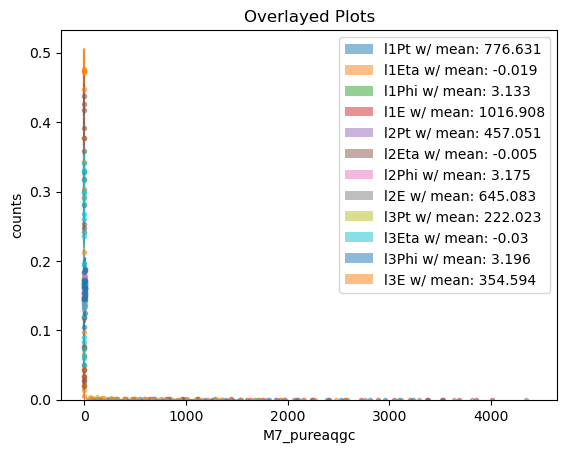

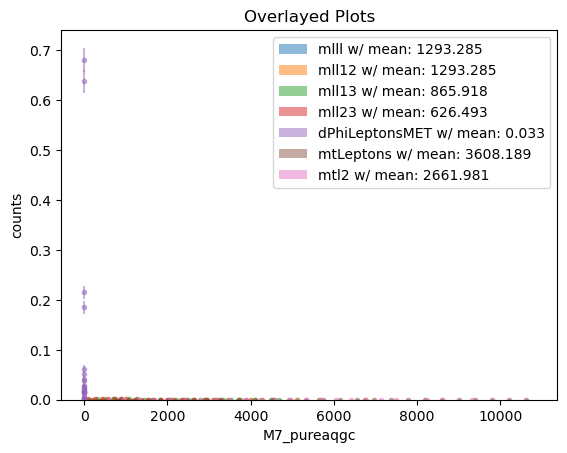

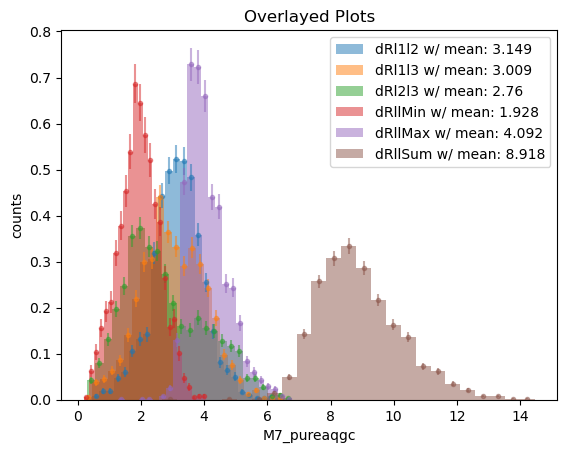

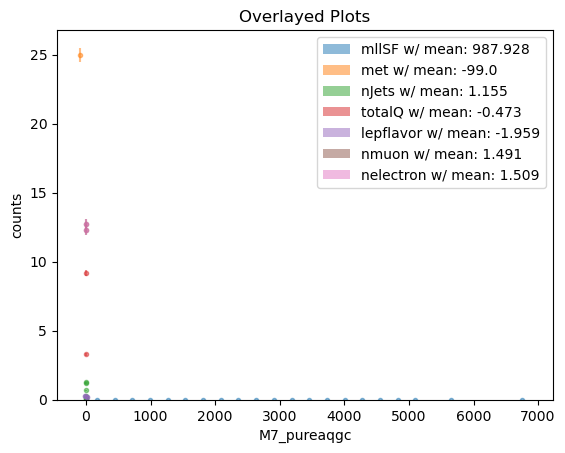

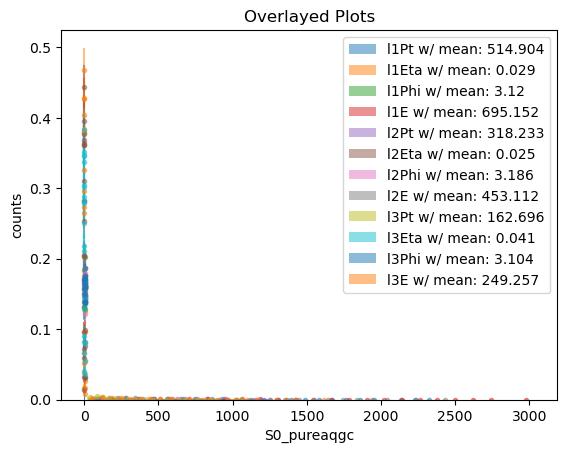

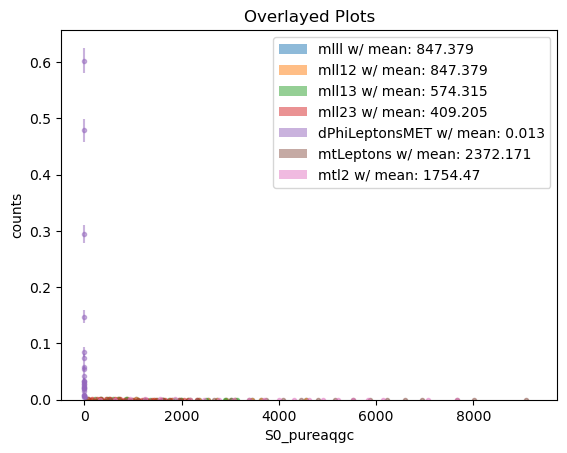

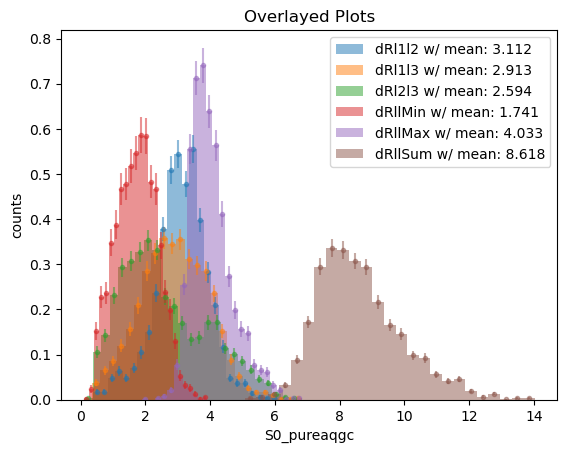

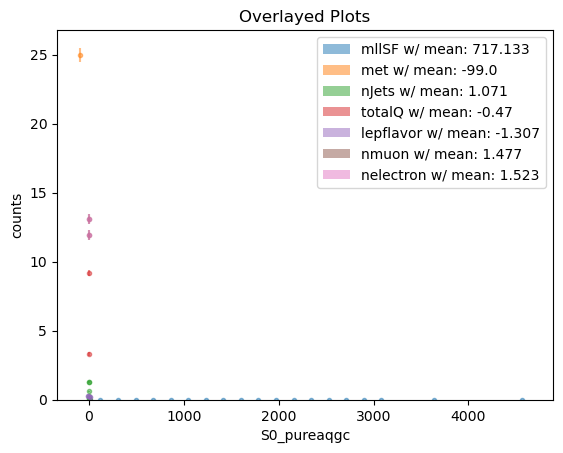

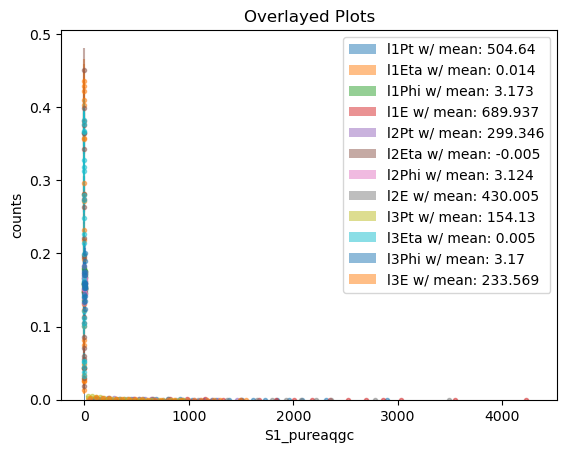

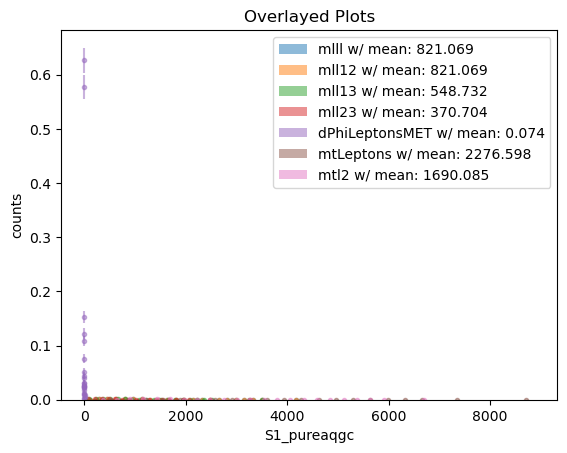

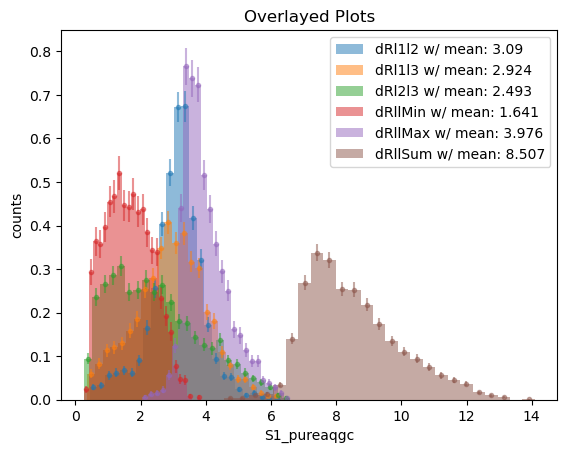

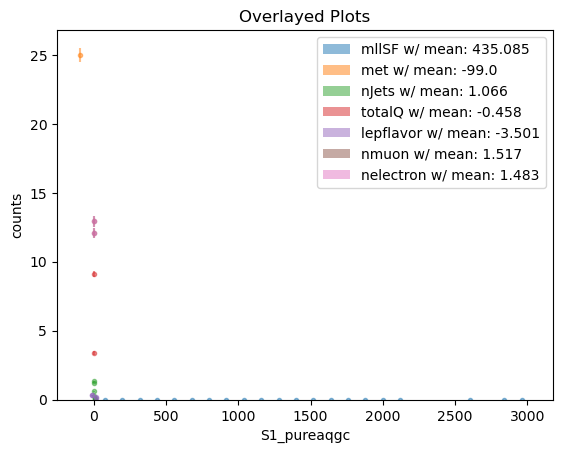

In [17]:
pt_eta_phi_E = cols[2:14]
masses = cols[14:21]
dR = cols[21:27]
others = cols[27:]

together = [pt_eta_phi_E,masses, dR, others]

for file in files:
    for each in together:
        graphCols(each, file)

In [51]:
#function to identify the operator that is most different to the SM
def maxValue(sm, operator, cols, num = 5):
    avgs = {}
    for col in cols:
        avg = calcAvg(operator, col)
        avgs[col] = avg
    sm_avg = calcAvg(sm, col)
    
    difs = {}
    for col in avgs:
        dif = abs(sm_avg-avgs[col])
        difs[dif] = col
    
    sort = sorted(difs)
    sort.reverse()
    
    top_vals = []

    for val in range(num): 
        key = sort[val]

        top_vals.append(difs[key])
    
    #return "Max Difference w/ SM: "+ max_dif[0] + "\nAll Avgs: "+str(avgs)
    return top_vals

In [52]:
sm = files[0]
for operator in files:
    ret = maxValue(sm, operator, cols)
    print("Max Differences for", operator, ":", ret)

Max Differences for pureSM.csv : ['mtLeptons', 'mtl2', 'l1E', 'mll12', 'mllSF']
Max Differences for T0_1em12_pureAQGC.csv : ['mtLeptons', 'mtl2', 'mll12', 'l1E', 'l1Pt']
Max Differences for M0_pureaqgc.csv : ['mtLeptons', 'mtl2', 'mll12', 'l1E', 'mllSF']
Max Differences for M1_pureaqgc.csv : ['mtLeptons', 'mtl2', 'mll12', 'l1E', 'mllSF']
Max Differences for M7_pureaqgc.csv : ['mtLeptons', 'mtl2', 'mll12', 'l1E', 'mllSF']
Max Differences for S0_pureaqgc.csv : ['mtLeptons', 'mtl2', 'mll12', 'mllSF', 'l1E']
Max Differences for S1_pureaqgc.csv : ['mtLeptons', 'mtl2', 'mll12', 'l1E', 'mll13']
